In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


In [2]:
df= pd.read_csv(r'C:\Users\user\Downloads\Holiday_Package.csv')

In [5]:
df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [4]:
del(df['Unnamed: 0'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872,NaN,NaN,NaN,47729.2,23418.7,1322,35324,41903.5,53469.5,236961
age,872,NaN,NaN,NaN,39.9553,10.5517,20,32,39,48,62
educ,872,NaN,NaN,NaN,9.30734,3.03626,1,8,9,12,21
no_young_children,872,NaN,NaN,NaN,0.311927,0.61287,0,0,0,0,3
no_older_children,872,NaN,NaN,NaN,0.982798,1.08679,0,0,1,2,6
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Check for Null Values**

In [8]:
df.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [9]:
df.shape

(872, 7)

In [10]:
#Univariate Analysis 
##In order to do Univariate analysis let us take a column of data - 'Salary'
## Storing the carat column in a variable in "data"

In [11]:
data = df['Salary']

In [12]:
len(data)

872

In [13]:
# checking for missing values

data.isnull().sum()

0

(array([  1.,   2.,   6.,  16.,  20.,  45.,  90., 173., 130.,  99.,  68.,
         57.,  25.,  31.,  23.,  20.,  13.,  13.,   5.,   3.,   4.,   1.,
          5.,   0.,   3.,   2.,   4.,   3.,   1.,   2.,   0.,   1.,   0.,
          0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   2.,   0.,   0.,   0.,   1.]),
 array([  1322.  ,   6034.78,  10747.56,  15460.34,  20173.12,  24885.9 ,
         29598.68,  34311.46,  39024.24,  43737.02,  48449.8 ,  53162.58,
         57875.36,  62588.14,  67300.92,  72013.7 ,  76726.48,  81439.26,
         86152.04,  90864.82,  95577.6 , 100290.38, 105003.16, 109715.94,
        114428.72, 119141.5 , 123854.28, 128567.06, 133279.84, 137992.62,
        142705.4 , 147418.18, 152130.96, 156843.74, 161556.52, 166269.3 ,
        170982.08, 175694.86, 180407.64, 185120.42, 189833.2 , 194545.98,
        199258.76, 203971.54, 208684.32, 213397.1 , 218109.88, 222822.66,
        227535.44, 232248.22, 236961.  ]),
 <BarContainer object o

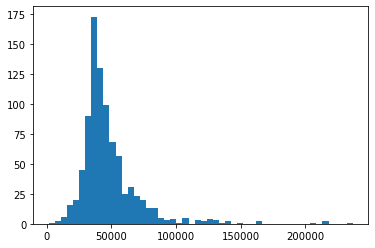

In [14]:
# The below code plots a histrogram 
plt.hist(data, bins=50)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

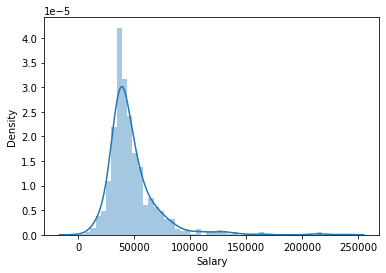

In [15]:
sns.distplot(data)
# plots a frequency polygon superimposed on a histogram using the seaborn package.
# seaborn automatically creates class intervals. The number of bins can also be manually set.

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

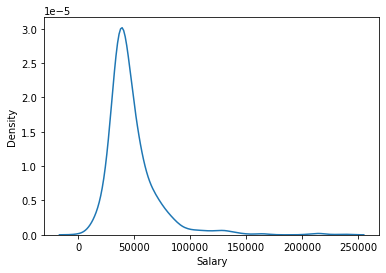

In [16]:
sns.distplot(data, hist=False) # removes the histogram and shows only the frequency

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

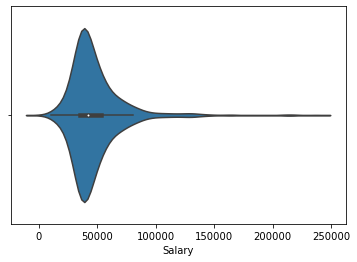

In [17]:
sns.violinplot(data) # plots a violin plt

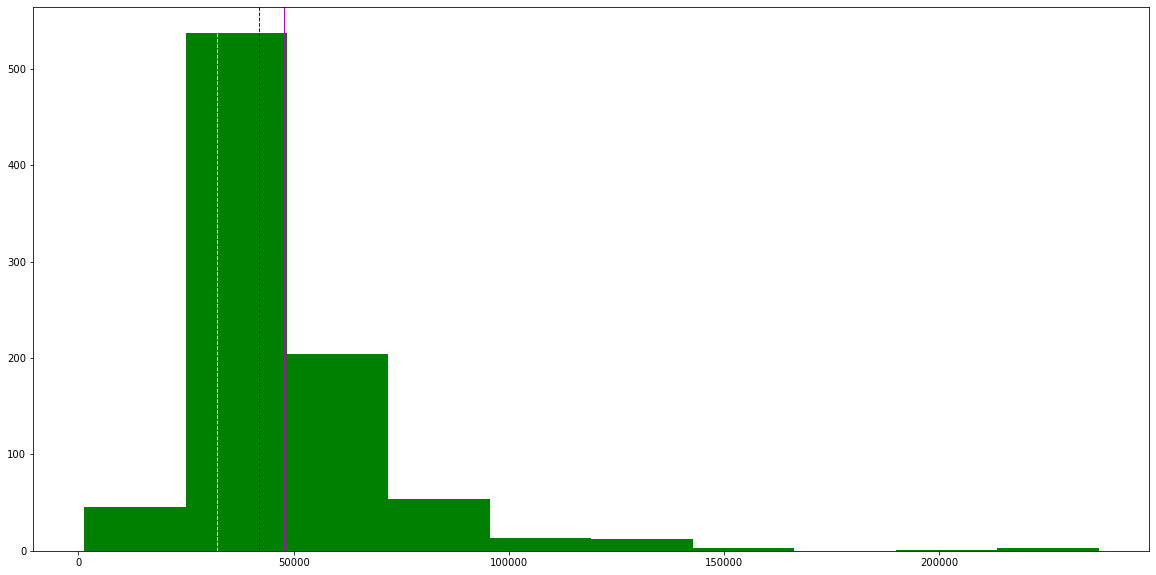

In [18]:
plt.figure(figsize=(20,10)) # makes the plot wider
plt.hist(data, color='g') # plots a simple histogram
plt.axvline(data.mean(), color='m', linewidth=1)
plt.axvline(data.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(data.mode()[0], color='w', linestyle='dashed', linewidth=1)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

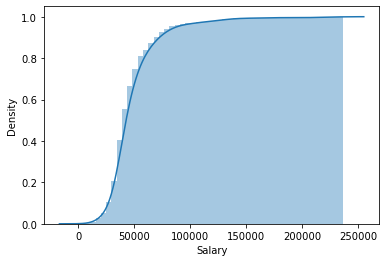

In [19]:
sns.distplot(data, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

In [20]:
#Performing Univariate analysis on another varibale "age"
##I'm saving the table data in data1

In [22]:
data1 = df['age']

In [23]:
len(data1)

872

In [24]:
# checking for missing values

data1.isnull().sum()

0

(array([ 8., 12.,  9., 11., 16., 17.,  0., 24., 19., 29., 19., 19.,  0.,
        32., 27., 30., 32., 31.,  0., 28., 21., 28., 25., 29.,  0., 26.,
        24., 21., 35., 23., 24.,  0., 26., 20., 23., 21., 22.,  0., 13.,
        10., 14., 17., 18.,  0., 18., 16., 14., 10.,  8.,  3.]),
 array([20.  , 20.84, 21.68, 22.52, 23.36, 24.2 , 25.04, 25.88, 26.72,
        27.56, 28.4 , 29.24, 30.08, 30.92, 31.76, 32.6 , 33.44, 34.28,
        35.12, 35.96, 36.8 , 37.64, 38.48, 39.32, 40.16, 41.  , 41.84,
        42.68, 43.52, 44.36, 45.2 , 46.04, 46.88, 47.72, 48.56, 49.4 ,
        50.24, 51.08, 51.92, 52.76, 53.6 , 54.44, 55.28, 56.12, 56.96,
        57.8 , 58.64, 59.48, 60.32, 61.16, 62.  ]),
 <BarContainer object of 50 artists>)

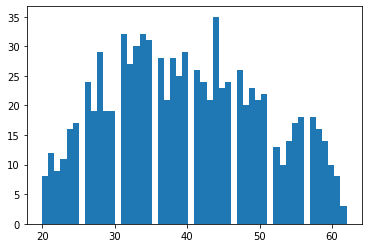

In [25]:
# The below code plots a histrogram 
plt.hist(data1, bins=50)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

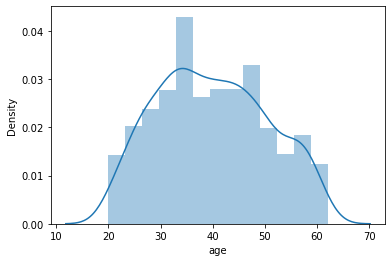

In [26]:
sns.distplot(data1)
# plots a frequency polygon superimposed on a histogram using the seaborn package.
# seaborn automatically creates class intervals. The number of bins can also be manually set.

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

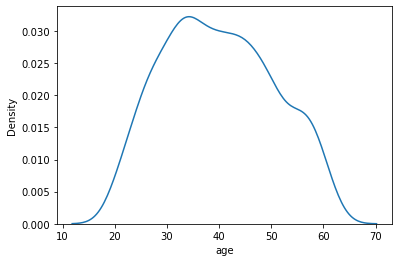

In [27]:
sns.distplot(data1, hist=False) # removes the histogram and shows only the frequency

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

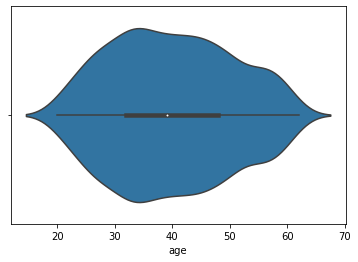

In [28]:
sns.violinplot(data1) # plots a violin plt

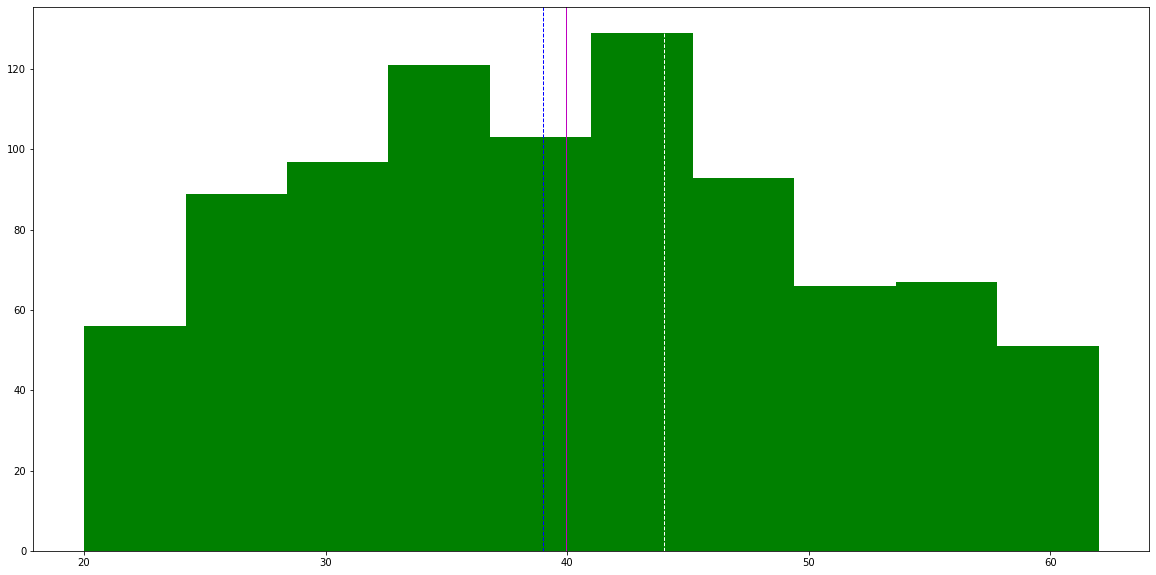

In [29]:
plt.figure(figsize=(20,10)) # makes the plot wider
plt.hist(data1, color='g') # plots a simple histogram
plt.axvline(data1.mean(), color='m', linewidth=1)
plt.axvline(data1.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(data1.mode()[0], color='w', linestyle='dashed', linewidth=1)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

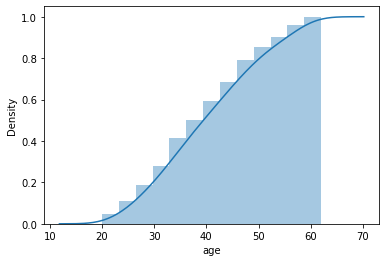

In [30]:
sns.distplot(data1, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

<AxesSubplot:>

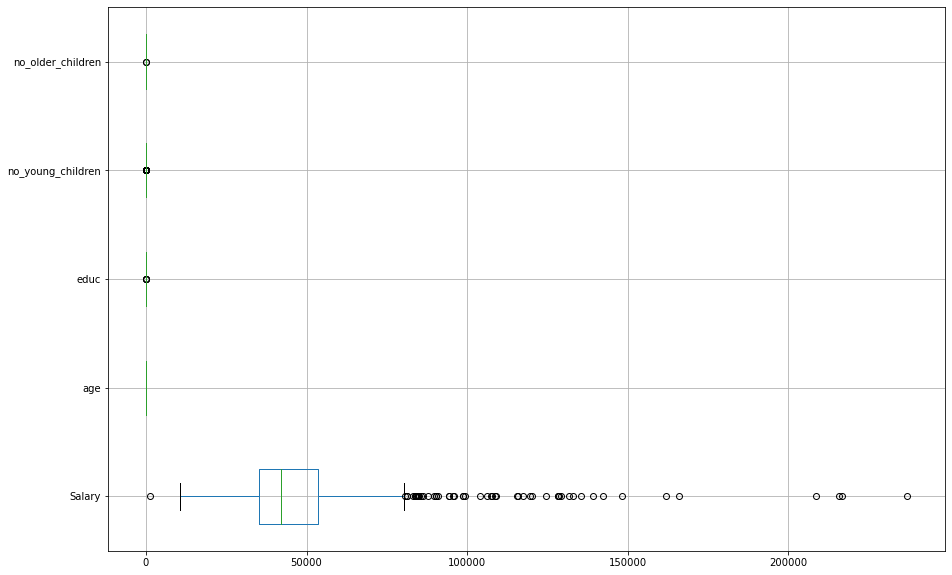

In [33]:
## Checking for Outliers
# construct box plot for continuous variables
plt.figure(figsize=(15,10))
df[['Salary', 'age', 'educ', 'no_young_children','no_older_children']].boxplot(vert=0)

In [34]:
#Bivariate Analysis

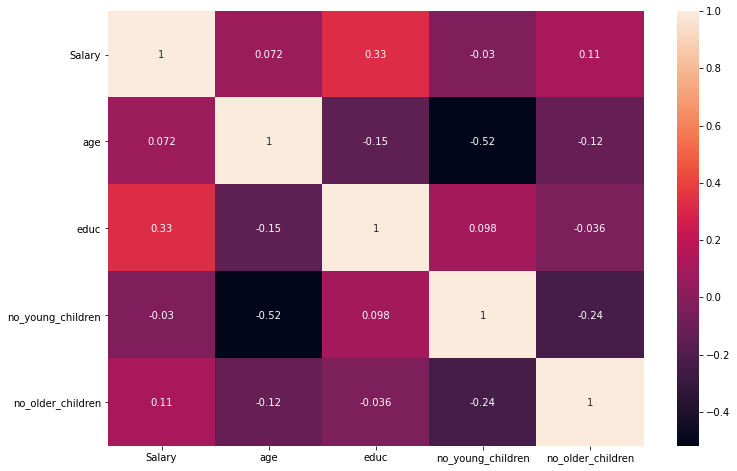

In [35]:
plt.figure(figsize=(12, 8))

df_corr = df.corr()
sns.heatmap(df_corr, 
            xticklabels = df_corr.columns.values,
            yticklabels = df_corr.columns.values,
            annot = True);

In [36]:
#Crossplots

<Figure size 1008x1008 with 0 Axes>

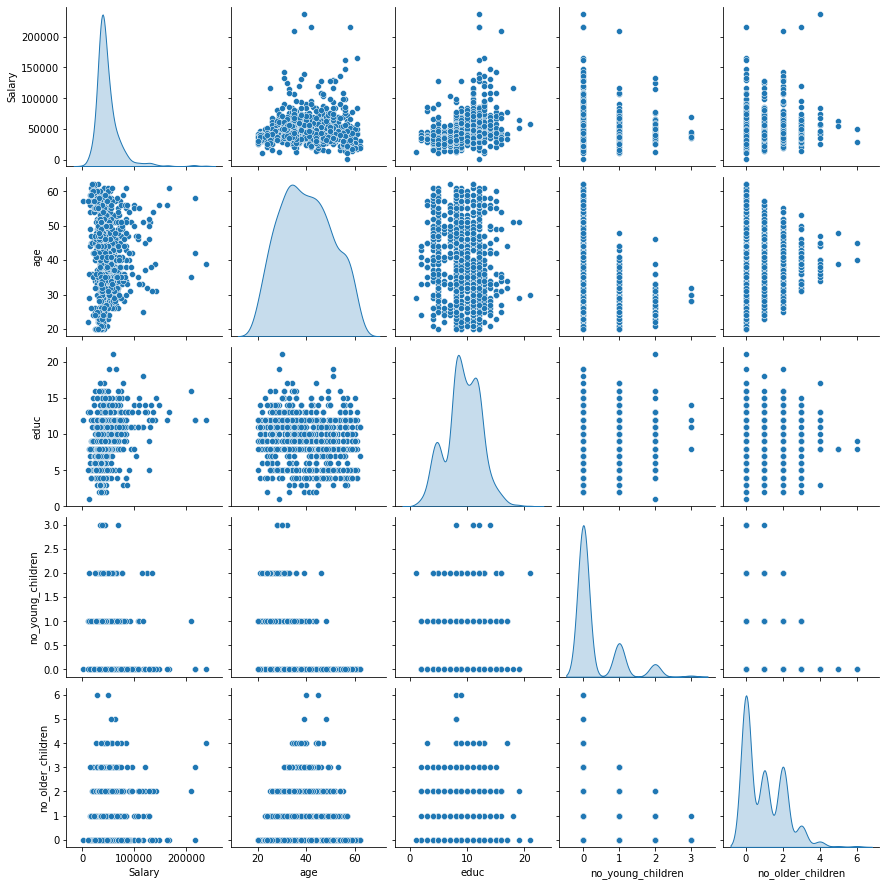

In [37]:
plt.figure(figsize=(14, 14))

sns.pairplot(df, diag_kind='kde');

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary', ylabel='age'>

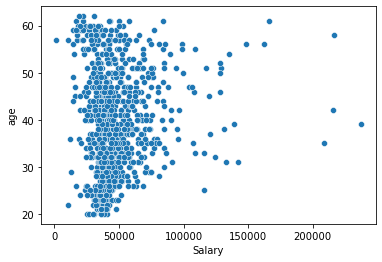

In [38]:
#A scatter plot can also be plotted for two columns

sns.scatterplot(df['Salary'], df['age'])  

In [39]:
df.corr() 

,Salary,age,educ,no_young_children,no_older_children
Salary,1.000000,0.071709,0.326540,-0.029664,0.113772
age,0.071709,1.000000,-0.149294,-0.519093,-0.116205
educ,0.326540,-0.149294,1.000000,0.098350,-0.036321
no_young_children,-0.029664,-0.519093,0.098350,1.000000,-0.238428
no_older_children,0.113772,-0.116205,-0.036321,-0.238428,1.000000


<AxesSubplot:>

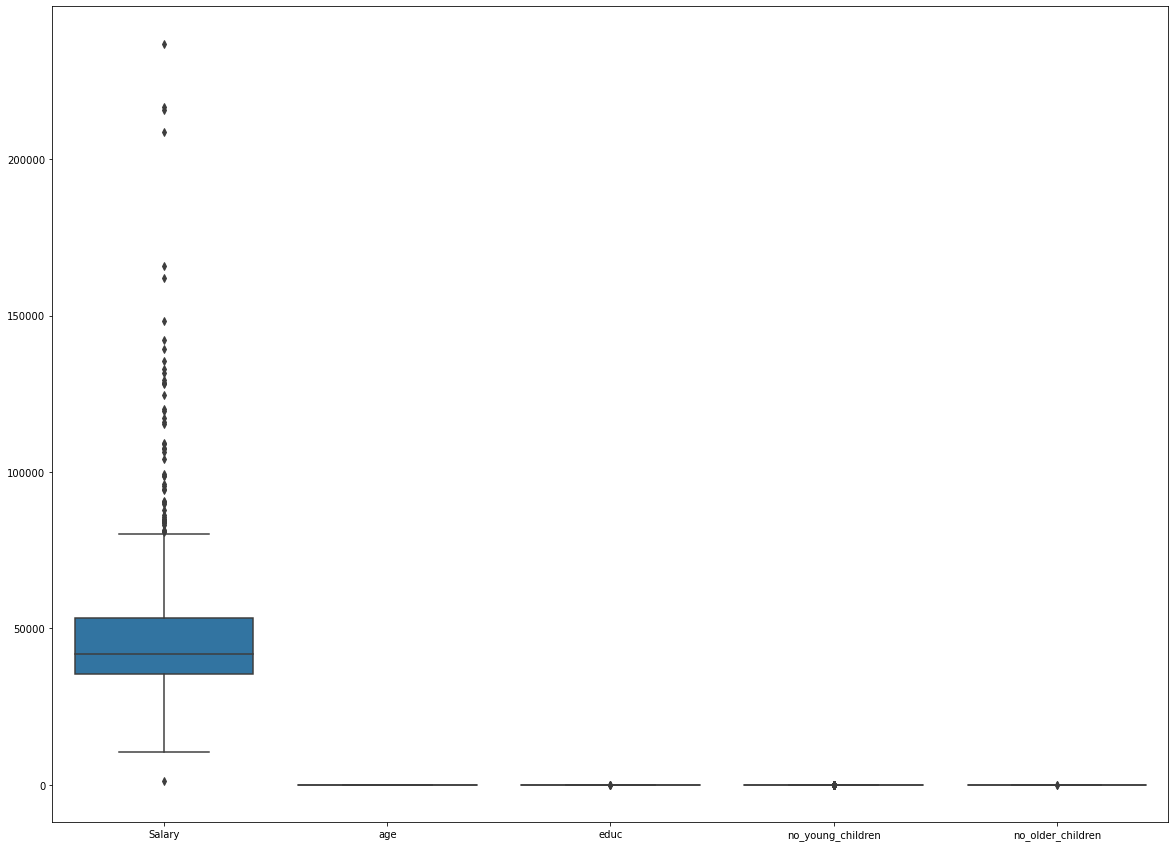

In [40]:
plt.figure(figsize=(20,15))
sns.boxplot(data=df)

In [41]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

HOLLIDAY_PACKAGE :  2
yes    401
no     471
Name: Holliday_Package, dtype: int64


FOREIGN :  2
yes    216
no     656
Name: foreign, dtype: int64




In [42]:
### Converting categorical to dummy variables

In [47]:
df = pd.get_dummies(df, columns=['Holliday_Package','foreign'],drop_first=True)

In [48]:
df.head()

,Salary,age,educ,no_young_children,no_older_children,Holliday_Package_yes,foreign_yes
0,48412,30,8,1,1,0,0
1,37207,45,8,0,1,1,0
2,58022,46,9,0,0,0,0
3,66503,31,11,2,0,0,0
4,66734,44,12,0,2,0,0


In [49]:
### Imputing missing values

In [50]:
for column in df.columns:
    if df[column].dtype != 'object':
        mean = df[column].mean()
        df[column] = df[column].fillna(mean)    
        
df.isnull().sum()  

Salary                  0
age                     0
educ                    0
no_young_children       0
no_older_children       0
Holliday_Package_yes    0
foreign_yes             0
dtype: int64

In [52]:
df.dtypes

Salary                  int64
age                     int64
educ                    int64
no_young_children       int64
no_older_children       int64
Holliday_Package_yes    uint8
foreign_yes             uint8
dtype: object

In [53]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 0


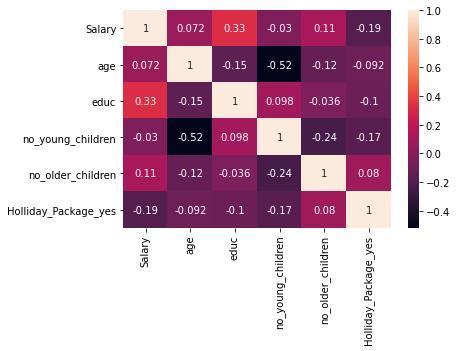

In [54]:
sns.heatmap(df.iloc[:, 0:6].corr(),annot=True)
plt.show()

In [55]:
df.head()

,Salary,age,educ,no_young_children,no_older_children,Holliday_Package_yes,foreign_yes
0,48412,30,8,1,1,0,0
1,37207,45,8,0,1,1,0
2,58022,46,9,0,0,0,0
3,66503,31,11,2,0,0,0
4,66734,44,12,0,2,0,0


In [56]:
# Copy all the predictor variables into X dataframe
X = df.drop('Holliday_Package_yes', axis=1)

# Copy target into the y dataframe. 
y = df[['Holliday_Package_yes']]

In [57]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [59]:
y_train.value_counts()

Holliday_Package_yes
0                       329
1                       281
dtype: int64

In [61]:
y_test.value_counts()

Holliday_Package_yes
0                       142
1                       120
dtype: int64

In [64]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.9s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [65]:
### Predicting on Training and Test dataset

In [66]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [67]:
### Getting the Predicted Classes and Probs

In [68]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.685349,0.314651
1,0.539469,0.460531
2,0.697042,0.302958
3,0.496348,0.503652
4,0.557723,0.442277


In [69]:
## Model Evaluation


In [70]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.6672131147540984

In [74]:
### AUC and ROC for the training data
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

AUC: 0.735


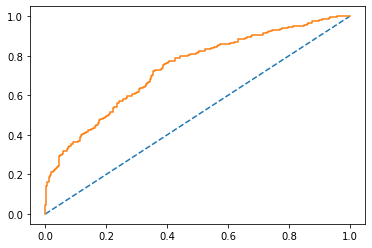

In [75]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [76]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.6526717557251909

In [77]:
### AUC and ROC for the test data


AUC: 0.735


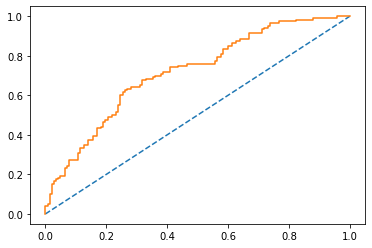

In [78]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [79]:
### Confusion Matrix for the training data

In [80]:
confusion_matrix(y_train, ytrain_predict)

array([[244,  85],
       [118, 163]], dtype=int64)

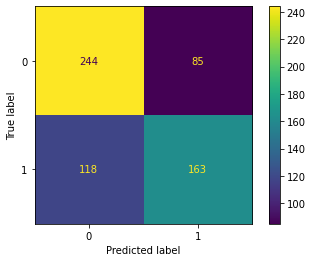

In [81]:
plot_confusion_matrix(model,X_train,y_train);

In [82]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610



In [83]:
### Confusion Matrix for test data

In [84]:
confusion_matrix(y_test, ytest_predict)

array([[109,  33],
       [ 58,  62]], dtype=int64)

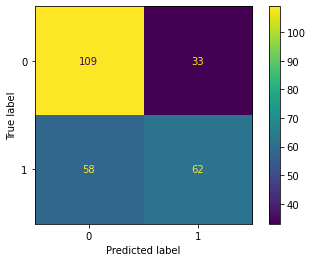

In [85]:
plot_confusion_matrix(model,X_test,y_test);

In [95]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.65      0.77      0.71       142
           1       0.65      0.52      0.58       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.65       262



In [98]:
### linear discriminant analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale


In [99]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.30,random_state=1,stratify = Y)

In [100]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',Y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',Y_test.shape)

Number of rows and columns of the training set for the independent variables: (610, 6)
Number of rows and columns of the training set for the dependent variable: (610,)
Number of rows and columns of the test set for the independent variables: (262, 6)
Number of rows and columns of the test set for the dependent variable: (262,)


In [101]:
### LDA Model

In [102]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)

In [103]:
### Prediction

In [104]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

In [105]:
### Training Data and Test Data Confusion Matrix Comparison

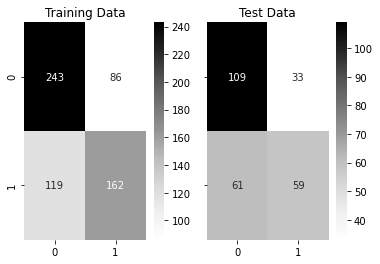

In [106]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [107]:
### Training Data and Test Data Classification Report Comparison


In [108]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.58      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.64      0.77      0.70       142
           1       0.64      0.49      0.56       120

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.63       262
 



In [109]:
### Probability prediction for the training and test data


In [110]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [111]:
pred_prob_train[:,1]

array([0.7381512 , 0.28961707, 0.38234291, 0.76483486, 0.46682945,
       0.44346246, 0.37680169, 0.30948321, 0.61081614, 0.64208316,
       0.25213217, 0.26469615, 0.39923017, 0.04631524, 0.23022974,
       0.36249565, 0.53701148, 0.33367574, 0.63047975, 0.62551868,
       0.62038047, 0.26045898, 0.8778445 , 0.33010529, 0.09907975,
       0.83197262, 0.20726445, 0.7448485 , 0.52475576, 0.18602064,
       0.34007289, 0.32707499, 0.37873484, 0.42874061, 0.31084381,
       0.28746402, 0.11553843, 0.53094637, 0.47040748, 0.22122639,
       0.26026817, 0.80975365, 0.51459465, 0.74029285, 0.79737631,
       0.40099878, 0.298335  , 0.93065406, 0.44451279, 0.70660174,
       0.75490574, 0.46875931, 0.77220783, 0.37565531, 0.22661608,
       0.74188557, 0.26237721, 0.5247693 , 0.6721239 , 0.34088095,
       0.62335813, 0.57741879, 0.54295979, 0.45085985, 0.56389786,
       0.5965561 , 0.12149134, 0.57410954, 0.3890238 , 0.26157228,
       0.35655665, 0.7429183 , 0.76617151, 0.22742495, 0.42898

AUC for the Training Data: 0.733
AUC for the Test Data: 0.714


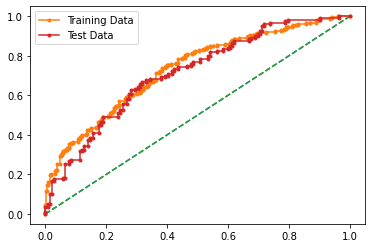

In [112]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()